<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/PCA_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [ ]:
!pip install factor_analyzer -q
!pip install geopandas -q
!pip install unidecode -q
!pip install --upgrade folium -q
!pip install mapclassify -q

In [ ]:
folium.__version__

'0.12.1.post1'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import mapclassify
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from unidecode import unidecode
import geopandas as gpd

# Loading Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/MpRonald/datasets/main/distritos_sp.csv')
data.head()

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994


#Correlation Matrix

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB


In [ ]:
dataset = data.drop(['cod_ibge', 'distritos'], axis=1)
dataset.corr()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
renda,1.000000,0.920099,0.777332,0.732307,-0.519585,-0.424711,-0.462516,-0.146957,-0.019711
quota,0.920099,1.000000,0.850455,0.832737,-0.520282,-0.554767,-0.491020,-0.243010,0.057374
escolaridade,0.777332,0.850455,1.000000,0.955825,-0.582601,-0.692968,-0.606621,-0.432548,0.157673
idade,0.732307,0.832737,0.955825,1.000000,-0.553758,-0.703237,-0.615073,-0.499838,0.141469
mortalidade,-0.519585,-0.520282,-0.582601,-0.553758,1.000000,0.346049,0.422790,0.130877,-0.093018
txcresc,-0.424711,-0.554767,-0.692968,-0.703237,0.346049,1.000000,0.234472,0.281853,-0.279084
causasext,-0.462516,-0.491020,-0.606621,-0.615073,0.422790,0.234472,1.000000,0.404447,-0.045281
favel,-0.146957,-0.243010,-0.432548,-0.499838,0.130877,0.281853,0.404447,1.000000,-0.106481
denspop,-0.019711,0.057374,0.157673,0.141469,-0.093018,-0.279084,-0.045281,-0.106481,1.000000


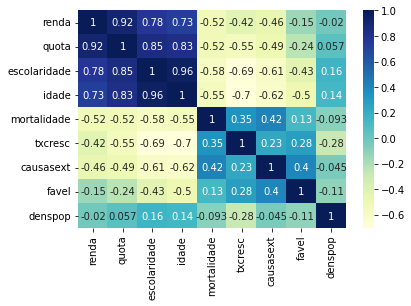

In [ ]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True);

# KMO Criteriun

https://en.wikipedia.org/wiki/Kaiser%E2%80%93Meyer%E2%80%93Olkin_test

In [ ]:
kmo_var, kmo = calculate_kmo(dataset)
kmo_var, kmo

(array([0.77458268, 0.8162995 , 0.85349799, 0.81435935, 0.94571275,
        0.83865337, 0.88877823, 0.78520104, 0.62787251]), 0.8301590047345352)

# Bartlett’s Test of Sphericity

https://www.statology.org/bartletts-test-of-sphericity/

In [ ]:
chi_square, p_vlue = calculate_bartlett_sphericity(dataset)
chi_square, p_vlue

(756.7510141832704, 9.27120181821642e-136)

# Executing PCA on Data 

### Standarization

In [ ]:
std_columns = dataset.columns
std_dataset = StandardScaler().fit_transform(dataset)
std_dataset

array([[ 1.08502328e-01,  1.80715140e-01,  5.23096244e-01,
         1.05541274e+00, -4.29281808e-01, -5.38805723e-01,
        -7.80681293e-01, -7.56406323e-01,  5.21804668e-01],
       [ 2.40630528e+00,  1.98438577e+00,  1.32019516e+00,
         1.28464265e+00, -1.47188596e+00, -7.33574170e-01,
        -1.40197826e+00, -6.68425227e-01, -8.57183702e-01],
       [-7.90322801e-01, -1.13342509e+00, -1.27037668e+00,
        -1.00765651e+00, -1.27369371e-01,  5.17822174e+00,
        -2.08708641e+00, -7.56406323e-01, -1.84993379e+00],
       [-5.64581006e-01, -4.12654904e-01, -2.74002674e-01,
        -9.07368417e-02,  4.90544879e-01, -3.18259087e-01,
         2.21327218e-01, -7.04087705e-02,  7.83822446e-01],
       [-6.29818314e-01, -6.35605024e-01, -7.47280632e-02,
        -9.07368417e-02,  7.52202169e-01, -4.12779054e-01,
        -1.65420498e-01, -2.32344990e-01,  1.36865133e+00],
       [ 5.20636431e-01,  1.67189899e-01,  9.21645940e-01,
         8.26182822e-01, -1.48396254e+00, -6.247330

In [ ]:
std_dataset = pd.DataFrame(std_dataset, columns=std_columns)
std_dataset.head()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,0.108502,0.180715,0.523096,1.055413,-0.429282,-0.538806,-0.780681,-0.756406,0.521805
1,2.406305,1.984386,1.320195,1.284643,-1.471886,-0.733574,-1.401978,-0.668425,-0.857184
2,-0.790323,-1.133425,-1.270377,-1.007657,-0.127369,5.178222,-2.087086,-0.756406,-1.849934
3,-0.564581,-0.412655,-0.274003,-0.090737,0.490545,-0.318259,0.221327,-0.070409,0.783822
4,-0.629818,-0.635605,-0.074728,-0.090737,0.752202,-0.412779,-0.165420,-0.232345,1.368651


### PCA Method

In [ ]:
pca = PCA(n_components=std_dataset.shape[1]).fit(std_dataset)
pca

PCA(n_components=9)

### Checking the varaible explained by factors

In [ ]:
pca.explained_variance_ratio_

array([0.55067008, 0.1293709 , 0.11070601, 0.08045185, 0.05881136,
       0.04425824, 0.01440763, 0.00722961, 0.00409432])

In [ ]:
factors = [f'F{i+1}'for i in range(std_dataset.shape[1])]
factors

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']

In [ ]:
fig = px.bar(x=factors, y=pca.explained_variance_ratio_,
             text=np.around(pca.explained_variance_ratio_, decimals=2), title='Scree Plot')
fig.update_layout(yaxis={'title': 'Variance explained by Percentage', 'tickfont':{'size':12}},
                  xaxis={'title': 'Factors', 'tickfont':{'size':12}},
                  title={'font':{'size':20}})
fig.show()

In [ ]:
accumulated_variance = [sum(pca.explained_variance_ratio_[0:i+1]) for i in range(std_dataset.shape[1])]
accumulated_variance

[0.5506700772160416,
 0.6800409820794436,
 0.7907469955852218,
 0.8711988432249138,
 0.930010202543966,
 0.9742684414070405,
 0.9886760753033329,
 0.9959056848263387,
 1.0000000000000002]

In [ ]:
fig = px.bar(x=factors, y=accumulated_variance, text=np.around(accumulated_variance,
                                                              decimals=2), title='Scree Plot')
fig.update_layout(yaxis={'title': 'Variance explained by Percentage', 'tickfont':{'size':12}},
                  xaxis={'title': 'Factors', 'tickfont':{'size':12}},
                  title={'font':{'size':20}})
fig.show()

### Autovalues

In [ ]:
autovalues = pca.explained_variance_ratio_ * std_dataset.shape[1]
autovalues

array([4.95603069, 1.16433814, 0.99635412, 0.72406663, 0.52930223,
       0.39832415, 0.12966871, 0.06506649, 0.03684884])

In [ ]:
sum(autovalues)

9.000000000000004

In [ ]:
selected_factors = ["Factors Selected" if autovalue > 1 else "Factor don't Selected" for autovalue in autovalues]
selected_factors

['Factors Selected',
 'Factors Selected',
 "Factor don't Selected",
 "Factor don't Selected",
 "Factor don't Selected",
 "Factor don't Selected",
 "Factor don't Selected",
 "Factor don't Selected",
 "Factor don't Selected"]

In [ ]:
fig = px.bar(x = range(std_dataset.shape[1]), y=autovalues,
             text=np.around(autovalues, decimals=2), title='Scree Plot',
             color=selected_factors)
fig.update_layout(yaxis={'title': 'Numbers of variables Explained', 'tickfont':{'size':12}},
                  xaxis={'title': 'Autovalues', 'tickfont':{'size':12}},
                  title={'font':{'size':20}})
fig.show()

In [ ]:
resume_data = pd.DataFrame({'factor':factors, 'autovalues':autovalues,
                            'explained_variance':pca.explained_variance_ratio_,
                            'acum_variance':accumulated_variance})
resume_data

,factor,autovalues,explained_variance,acum_variance
0,F1,4.956031,0.550670,0.550670
1,F2,1.164338,0.129371,0.680041
2,F3,0.996354,0.110706,0.790747
3,F4,0.724067,0.080452,0.871199
4,F5,0.529302,0.058811,0.930010
5,F6,0.398324,0.044258,0.974268
6,F7,0.129669,0.014408,0.988676
7,F8,0.065066,0.007230,0.995906
8,F9,0.036849,0.004094,1.000000


### Factor Loading and Commonality

In [ ]:
pca.components_

array([[ 0.37378561,  0.40454585,  0.43416448,  0.431286  , -0.29453553,
        -0.31298937, -0.29942197, -0.20536447,  0.0746924 ],
       [ 0.34194215,  0.20986443, -0.02279207, -0.06065282, -0.16369471,
         0.31272645, -0.04069338,  0.41039975, -0.73495343],
       [-0.17295765, -0.15501444, -0.00935731,  0.06348322,  0.17379496,
         0.27775581, -0.43911857, -0.68814007, -0.41015077],
       [-0.06339126, -0.13996332, -0.08458471, -0.12690816, -0.58019562,
         0.45311541, -0.49035151,  0.1587924 ,  0.38148578],
       [ 0.34200389,  0.27796072,  0.00388393, -0.03140668,  0.68113225,
         0.35010444, -0.28968662,  0.14639622,  0.33601377],
       [ 0.30718994,  0.21266882, -0.051763  , -0.06507346, -0.21449531,
         0.46702002,  0.58641913, -0.46772469,  0.16347059],
       [ 0.35731885,  0.14779821, -0.5314497 , -0.53511308, -0.08829316,
        -0.42300489, -0.21675972, -0.21903914, -0.00154526],
       [-0.56495425,  0.74089992, -0.33214191,  0.12879361, -0

In [ ]:
autovetor_dataset = pd.DataFrame(pca.components_, columns=std_columns,
                                 index = [f"autovetor {i+1}" for i in range(std_dataset.shape[1])])
autovetor_dataset

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
autovetor 1,0.373786,0.404546,0.434164,0.431286,-0.294536,-0.312989,-0.299422,-0.205364,0.074692
autovetor 2,0.341942,0.209864,-0.022792,-0.060653,-0.163695,0.312726,-0.040693,0.410400,-0.734953
autovetor 3,-0.172958,-0.155014,-0.009357,0.063483,0.173795,0.277756,-0.439119,-0.688140,-0.410151
autovetor 4,-0.063391,-0.139963,-0.084585,-0.126908,-0.580196,0.453115,-0.490352,0.158792,0.381486
autovetor 5,0.342004,0.277961,0.003884,-0.031407,0.681132,0.350104,-0.289687,0.146396,0.336014
autovetor 6,0.307190,0.212669,-0.051763,-0.065073,-0.214495,0.467020,0.586419,-0.467725,0.163471
autovetor 7,0.357319,0.147798,-0.531450,-0.535113,-0.088293,-0.423005,-0.216760,-0.219039,-0.001545
autovetor 8,-0.564954,0.740900,-0.332142,0.128794,-0.043236,0.046332,-0.022126,0.019462,-0.010178
autovetor 9,-0.226373,0.235400,0.638974,-0.694279,0.002605,-0.004163,-0.011863,-0.045723,-0.027849


### Factorial Loading

In [ ]:
sqrt_autovalues = np.sqrt(autovalues)
sqrt_autovalues

array([2.22621443, 1.07904501, 0.9981754 , 0.85092105, 0.7275316 ,
       0.63112927, 0.36009541, 0.25508133, 0.19196051])

In [ ]:
factorial_load = pd.DataFrame(pca.components_.T * sqrt_autovalues,
                              columns=factors, index=std_columns)
factorial_load

,F1,F2,F3,F4,F5,F6,F7,F8,F9
renda,0.832127,0.368971,-0.172642,-0.053941,0.248819,0.193877,0.128669,-0.144109,-0.043455
quota,0.900606,0.226453,-0.154732,-0.119098,0.202225,0.134222,0.053221,0.188990,0.045188
escolaridade,0.966543,-0.024594,-0.009340,-0.071975,0.002826,-0.032669,-0.191373,-0.084723,0.122658
idade,0.960135,-0.065447,0.063367,-0.107989,-0.022849,-0.041070,-0.192692,0.032853,-0.133274
mortalidade,-0.655699,-0.176634,0.173478,-0.493701,0.495545,-0.135374,-0.031794,-0.011029,0.000500
txcresc,-0.696781,0.337446,0.277249,0.385565,0.254712,0.294750,-0.152322,0.011818,-0.000799
causasext,-0.666578,-0.043910,-0.438317,-0.417250,-0.210756,0.370106,-0.078054,-0.005644,-0.002277
favel,-0.457185,0.442840,-0.686884,0.135120,0.106508,-0.295195,-0.078875,0.004964,-0.008777
denspop,0.166281,-0.793048,-0.409402,0.324614,0.244461,0.103171,-0.000556,-0.002596,-0.005346


In [ ]:
resume_factorial_load = factorial_load[['F1', 'F2']].copy()
resume_factorial_load

,F1,F2
renda,0.832127,0.368971
quota,0.900606,0.226453
escolaridade,0.966543,-0.024594
idade,0.960135,-0.065447
mortalidade,-0.655699,-0.176634
txcresc,-0.696781,0.337446
causasext,-0.666578,-0.043910
favel,-0.457185,0.442840
denspop,0.166281,-0.793048


In [ ]:
f = px.scatter(factorial_load, x='F1', y='F2', text=factorial_load.index)
f.update_traces(textposition='top center')

###Commonality

In [ ]:
resume_factorial_load['commonality'] = (resume_factorial_load ** 2).sum(axis=1)
resume_factorial_load

,F1,F2,commonality
renda,0.832127,0.368971,0.828575
quota,0.900606,0.226453,0.862372
escolaridade,0.966543,-0.024594,0.934811
idade,0.960135,-0.065447,0.926143
mortalidade,-0.655699,-0.176634,0.461141
txcresc,-0.696781,0.337446,0.599374
causasext,-0.666578,-0.043910,0.446254
favel,-0.457185,0.442840,0.405126
denspop,0.166281,-0.793048,0.656574


# Getting the Factor Scores

In [ ]:
data_factor_scores = pd.DataFrame(pca.transform(std_dataset), columns=factors)
data_factor_scores

,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1.519105,-0.761299,0.440370,0.256326,-0.134060,-0.202264,-0.177369,0.025619,-0.350088
1,3.985600,1.555514,0.313021,0.070926,0.100206,0.332763,0.655952,-0.105873,-0.055641
2,-2.681205,2.356295,3.872196,3.061874,1.039798,0.920633,-0.793794,0.194619,-0.111070
3,-0.574202,-1.061710,-0.214948,-0.121274,0.105649,-0.204103,-0.011002,0.042348,-0.100050
4,-0.457007,-1.688282,-0.110352,0.089602,0.452111,-0.437592,-0.037891,-0.168406,-0.013653
...,...,...,...,...,...,...,...,...,...
91,-0.222504,-1.876371,-0.553807,0.480278,-0.054540,0.281924,0.172851,-0.051022,-0.148682
92,0.651970,-0.175635,-0.277139,-0.095741,-0.422490,-0.538550,-0.068902,0.134096,-0.299739
93,0.452520,1.141560,-1.023709,-0.413869,0.530598,-0.225303,0.175189,-0.413634,0.079473
94,-0.262248,0.698634,0.148829,0.407752,-0.198409,-0.272673,0.300921,-0.243063,-0.066496


In [ ]:
pca2 = PCA(n_components=2)
pd.DataFrame(pca2.fit_transform(std_dataset), columns=['f1', 'f2'])

,f1,f2
0,1.519105,-0.761299
1,3.985600,1.555514
2,-2.681205,2.356295
3,-0.574202,-1.061710
4,-0.457007,-1.688282
...,...,...
91,-0.222504,-1.876371
92,0.651970,-0.175635
93,0.452520,1.141560
94,-0.262248,0.698634


In [ ]:
f1 = np.zeros(std_dataset.shape[0])
for idx, var in enumerate(pca.feature_names_in_):
    f1 += pca.components_[0][idx] * std_dataset[var]
f1

0     1.519105
1     3.985600
2    -2.681205
3    -0.574202
4    -0.457007
        ...   
91   -0.222504
92    0.651970
93    0.452520
94   -0.262248
95   -2.870093
Name: renda, Length: 96, dtype: float64

### Factors Scores

In [ ]:
factors_scores = np.zeros(pca.components_.shape)
for i in range(len(pca.components_)):
    factors_scores[i] = pca.components_[i] / sqrt_autovalues[i]
factors_scores

array([[ 0.16790189,  0.18171917,  0.19502366,  0.19373066, -0.13230331,
        -0.14059264, -0.13449826, -0.09224829,  0.0335513 ],
       [ 0.31689332,  0.19449089, -0.02112244, -0.05620973, -0.15170332,
         0.2898178 , -0.0377124 ,  0.38033608, -0.68111471],
       [-0.1732738 , -0.1552978 , -0.00937442,  0.06359926,  0.17411264,
         0.27826353, -0.43992125, -0.68939795, -0.4109005 ],
       [-0.07449723, -0.16448449, -0.09940371, -0.14914211, -0.68184425,
         0.53249994, -0.5762597 ,  0.18661238,  0.448321  ],
       [ 0.47008802,  0.38205999,  0.00533851, -0.04316882,  0.93622359,
         0.48122231, -0.39817738,  0.20122318,  0.46185453],
       [ 0.48673063,  0.33696555, -0.08201647, -0.10310639, -0.33985956,
         0.73997522,  0.92915851, -0.74109174,  0.25901285],
       [ 0.99228938,  0.4104418 , -1.47585803, -1.48603139, -0.2451938 ,
        -1.17470224, -0.6019508 , -0.60828084, -0.00429124],
       [-2.21480047,  2.90456349, -1.30210199,  0.50491194, -0

### Getting Factors

In [ ]:
f1 = np.zeros(std_dataset.shape[0])
for idx, var in enumerate(pca.feature_names_in_):
    f1 += factors_scores[0][idx] * std_dataset[var]
f1

0     0.682371
1     1.790304
2    -1.204379
3    -0.257928
4    -0.205284
        ...   
91   -0.099947
92    0.292861
93    0.203269
94   -0.117800
95   -1.289226
Name: renda, Length: 96, dtype: float64

In [ ]:
f2 = np.zeros(std_dataset.shape[0])
for idx, var in enumerate(pca.feature_names_in_):
    f2 += pca.components_[1][idx] * std_dataset[var]
f2

0    -0.761299
1     1.555514
2     2.356295
3    -1.061710
4    -1.688282
        ...   
91   -1.876371
92   -0.175635
93    1.141560
94    0.698634
95   -1.073854
Name: renda, Length: 96, dtype: float64

In [ ]:
factors_data = data[['cod_ibge', 'distritos']].copy()
factors_data['f1'] = f1
factors_data['f2'] = f2
factors_data

,cod_ibge,distritos,f1,f2
0,1,Água Rasa,0.682371,-0.761299
1,12,Alto de Pinheiros,1.790304,1.555514
2,23,Anhanguera,-1.204379,2.356295
3,34,Aricanduva,-0.257928,-1.061710
4,45,Artur Alvim,-0.205284,-1.688282
...,...,...,...,...
91,92,Vila Medeiros,-0.099947,-1.876371
92,93,Vila Prudente,0.292861,-0.175635
93,94,Vila Sônia,0.203269,1.141560
94,95,São Domingos,-0.117800,0.698634


In [ ]:
data['f1'] = f1
data['f2'] = f2
data.head()

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,f1,f2
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,0.682371,-0.761299
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.790304,1.555514
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-1.204379,2.356295
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.257928,-1.061710
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.205284,-1.688282


# Getting the District Ranking

In [ ]:
factors_data['rankings'] = factors_data['f1'] * pca.explained_variance_ratio_[0] +\
factors_data['f2'] * pca.explained_variance_ratio_[1]

In [ ]:
factors_data.sort_values('rankings', ascending=False)

,cod_ibge,distritos,f1,f2,rankings
44,40,Jardim Paulista,2.466536,0.532436,1.427129
31,26,Moema,1.968233,1.477302,1.274967
70,69,Santo Amaro,1.897554,1.574882,1.248670
1,12,Alto de Pinheiros,1.790304,1.555514,1.187105
53,50,Morumbi,1.166425,3.260074,1.064074
...,...,...,...,...,...
42,38,Jardim Ângela,-1.684687,0.838884,-0.819180
95,96,Lajeado,-1.289226,-1.073854,-0.848863
10,3,Brasilândia,-1.531760,-0.050288,-0.850000
24,18,Cidade Tiradentes,-1.690649,-0.253586,-0.963797


In [ ]:
data['rankings'] = factors_data['rankings']
data.head()

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,f1,f2,rankings
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,0.682371,-0.761299,0.277272
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.790304,1.555514,1.187105
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-1.204379,2.356295,-0.358379
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.257928,-1.061710,-0.279387
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.205284,-1.688282,-0.331459


# Geopandas

In [ ]:
map_data = gpd.read_file('/content/drive/MyDrive/Datasets/SIRGAS_SHP_distrito_polygon.shp')
map_data

,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,ds_codigo,geometry
0,None,SANTANA-TUCURUVI,MAN,MANDAQUI,None,05,51,"POLYGON ((330950.373 7407837.176, 330952.177 7..."
1,None,MOOCA,MOO,MOOCA,None,25,53,"POLYGON ((338349.356 7394264.944, 338362.239 7..."
2,None,CASA VERDE-CACHOEIRINHA,LIM,LIMAO,None,04,50,"POLYGON ((329079.913 7402343.759, 329081.724 7..."
3,None,JABAQUARA,JAB,JABAQUARA,None,15,38,"POLYGON ((331924.648 7385714.896, 331932.746 7..."
4,None,CIDADE ADEMAR,CAD,CIDADE ADEMAR,None,16,22,"POLYGON ((332410.602 7378610.746, 332404.612 7..."
...,...,...,...,...,...,...,...,...
91,None,GUAIANASES,LAJ,LAJEADO,None,28,96,"POLYGON ((357579.815 7394795.986, 357572.551 7..."
92,None,LAPA,LAP,LAPA,None,08,48,"POLYGON ((323721.814 7398433.381, 323730.119 7..."
93,None,SE,LIB,LIBERDADE,None,09,49,"POLYGON ((332502.702 7392061.729, 332502.811 7..."
94,None,LAPA,JRE,JAGUARE,None,08,41,"POLYGON ((322952.516 7394978.618, 323250.620 7..."


In [ ]:
map_data.set_crs(epsg=31983, inplace=True)

,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,ds_codigo,geometry
0,None,SANTANA-TUCURUVI,MAN,MANDAQUI,None,05,51,"POLYGON ((330950.373 7407837.176, 330952.177 7..."
1,None,MOOCA,MOO,MOOCA,None,25,53,"POLYGON ((338349.356 7394264.944, 338362.239 7..."
2,None,CASA VERDE-CACHOEIRINHA,LIM,LIMAO,None,04,50,"POLYGON ((329079.913 7402343.759, 329081.724 7..."
3,None,JABAQUARA,JAB,JABAQUARA,None,15,38,"POLYGON ((331924.648 7385714.896, 331932.746 7..."
4,None,CIDADE ADEMAR,CAD,CIDADE ADEMAR,None,16,22,"POLYGON ((332410.602 7378610.746, 332404.612 7..."
...,...,...,...,...,...,...,...,...
91,None,GUAIANASES,LAJ,LAJEADO,None,28,96,"POLYGON ((357579.815 7394795.986, 357572.551 7..."
92,None,LAPA,LAP,LAPA,None,08,48,"POLYGON ((323721.814 7398433.381, 323730.119 7..."
93,None,SE,LIB,LIBERDADE,None,09,49,"POLYGON ((332502.702 7392061.729, 332502.811 7..."
94,None,LAPA,JRE,JAGUARE,None,08,41,"POLYGON ((322952.516 7394978.618, 323250.620 7..."


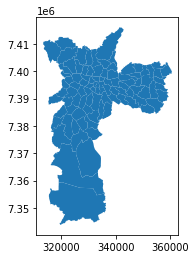

In [ ]:
map_data.plot()

###Treatment Geographic Data

In [ ]:
map_data.sort_values('ds_codigo')

,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,ds_codigo,geometry
43,None,MOOCA,ARA,AGUA RASA,None,25,1,"POLYGON ((341093.380 7391912.491, 341093.329 7..."
56,None,MOOCA,BRS,BRAS,None,25,10,"POLYGON ((333984.370 7396019.757, 333985.591 7..."
57,None,FREGUESIA-BRASILANDIA,BRL,BRASILANDIA,None,03,11,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
58,None,BUTANTA,BUT,BUTANTA,None,10,12,"POLYGON ((322177.067 7393085.002, 322176.956 7..."
59,None,CASA VERDE-CACHOEIRINHA,CAC,CACHOEIRINHA,None,04,13,"POLYGON ((330950.659 7402181.997, 330944.935 7..."
...,...,...,...,...,...,...,...,...
38,None,VILA MARIA-VILA GUILHERME,VMD,VILA MEDEIROS,None,07,92,"POLYGON ((340579.417 7401672.553, 340579.493 7..."
39,None,VILA PRUDENTE,VPR,VILA PRUDENTE,None,29,93,"POLYGON ((341731.295 7388459.495, 341723.755 7..."
42,None,BUTANTA,VSO,VILA SONIA,None,10,94,"POLYGON ((320805.525 7390280.495, 320824.353 7..."
23,None,PIRITUBA-JARAGUA,SDO,SAO DOMINGOS,None,02,95,"POLYGON ((319854.036 7402894.086, 319864.990 7..."


In [ ]:
map_data.columns

Index(['ds_areamt', 'ds_subpref', 'ds_sigla', 'ds_nome', 'ds_areakm',
       'ds_cd_sub', 'ds_codigo', 'geometry'],
      dtype='object')

In [ ]:
map_data = map_data.reindex(columns=['ds_codigo' ,'ds_areamt', 'ds_subpref', 'ds_sigla', 'ds_nome', 'ds_areakm',
       'ds_cd_sub', 'geometry'])

In [ ]:
map_data = map_data.sort_values('ds_codigo')
map_data

,ds_codigo,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,geometry
43,1,None,MOOCA,ARA,AGUA RASA,None,25,"POLYGON ((341093.380 7391912.491, 341093.329 7..."
56,10,None,MOOCA,BRS,BRAS,None,25,"POLYGON ((333984.370 7396019.757, 333985.591 7..."
57,11,None,FREGUESIA-BRASILANDIA,BRL,BRASILANDIA,None,03,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
58,12,None,BUTANTA,BUT,BUTANTA,None,10,"POLYGON ((322177.067 7393085.002, 322176.956 7..."
59,13,None,CASA VERDE-CACHOEIRINHA,CAC,CACHOEIRINHA,None,04,"POLYGON ((330950.659 7402181.997, 330944.935 7..."
...,...,...,...,...,...,...,...,...
38,92,None,VILA MARIA-VILA GUILHERME,VMD,VILA MEDEIROS,None,07,"POLYGON ((340579.417 7401672.553, 340579.493 7..."
39,93,None,VILA PRUDENTE,VPR,VILA PRUDENTE,None,29,"POLYGON ((341731.295 7388459.495, 341723.755 7..."
42,94,None,BUTANTA,VSO,VILA SONIA,None,10,"POLYGON ((320805.525 7390280.495, 320824.353 7..."
23,95,None,PIRITUBA-JARAGUA,SDO,SAO DOMINGOS,None,02,"POLYGON ((319854.036 7402894.086, 319864.990 7..."


In [ ]:
district_names = [unidecode(district).upper() for district in data['distritos']]
district_names

['AGUA RASA',
 'ALTO DE PINHEIROS',
 'ANHANGUERA',
 'ARICANDUVA',
 'ARTUR ALVIM',
 'BARRA FUNDA',
 'BELA VISTA',
 'BELEM',
 'BOM RETIRO',
 'BRAS',
 'BRASILANDIA',
 'BUTANTA',
 'CACHOEIRINHA',
 'CAMBUCI',
 'CAMPO BELO',
 'CAMPO GRANDE',
 'CAMPO LIMPO',
 'CANGAIBA',
 'CAPAO REDONDO',
 'CARRAO',
 'CASA VERDE',
 'CIDADE ADEMAR',
 'CIDADE DUTRA',
 'CIDADE LIDER',
 'CIDADE TIRADENTES',
 'CONSOLACAO',
 'CURSINO',
 'ERMELINO MATARAZZO',
 'FREGUESIA DO O',
 'GRAJAU',
 'GUAIANASES',
 'MOEMA',
 'IGUATEMI',
 'IPIRANGA',
 'ITAIM BIBI',
 'ITAIM PAULISTA',
 'ITAQUERA',
 'JABAQUARA',
 'JACANA',
 'JAGUARA',
 'JAGUARE',
 'JARAGUA',
 'JARDIM ANGELA',
 'JARDIM HELENA',
 'JARDIM PAULISTA',
 'JARDIM SAO LUIS',
 'JOSE BONIFACIO',
 'LAPA',
 'LIBERDADE',
 'LIMAO',
 'MANDAQUI',
 'MARSILAC',
 'MOOCA',
 'MORUMBI',
 'PARELHEIROS',
 'PARI',
 'PARQUE DO CARMO',
 'PEDREIRA',
 'PENHA',
 'PERDIZES',
 'PERUS',
 'PINHEIROS',
 'PIRITUBA',
 'PONTE RASA',
 'RAPOSO TAVARES',
 'REPUBLICA',
 'RIO PEQUENO',
 'SARCOMA',
 'SANTA 

In [ ]:
data['dist_names'] = district_names
data.head()

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,f1,f2,rankings,dist_names
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,0.682371,-0.761299,0.277272,AGUA RASA
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.790304,1.555514,1.187105,ALTO DE PINHEIROS
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-1.204379,2.356295,-0.358379,ANHANGUERA
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.257928,-1.061710,-0.279387,ARICANDUVA
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.205284,-1.688282,-0.331459,ARTUR ALVIM


In [ ]:
map_data.head()

,ds_codigo,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,geometry
43,1,None,MOOCA,ARA,AGUA RASA,None,25,"POLYGON ((341093.380 7391912.491, 341093.329 7..."
56,10,None,MOOCA,BRS,BRAS,None,25,"POLYGON ((333984.370 7396019.757, 333985.591 7..."
57,11,None,FREGUESIA-BRASILANDIA,BRL,BRASILANDIA,None,03,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
58,12,None,BUTANTA,BUT,BUTANTA,None,10,"POLYGON ((322177.067 7393085.002, 322176.956 7..."
59,13,None,CASA VERDE-CACHOEIRINHA,CAC,CACHOEIRINHA,None,04,"POLYGON ((330950.659 7402181.997, 330944.935 7..."


In [ ]:
map_data.ds_nome = map_data.ds_nome.sort_values()
data.dist_names = data.dist_names.sort_values()

In [ ]:
distincts_dit = data['dist_names'].values != map_data['ds_nome'].values
distincts_dit.sum()

88

In [ ]:
data.dist_names[distincts_dit].sort_values()

1     ALTO DE PINHEIROS
2            ANHANGUERA
3            ARICANDUVA
4           ARTUR ALVIM
5           BARRA FUNDA
            ...        
84         VILA FORMOSA
85       VILA GUILHERME
86           VILA JACUI
87      VILA LEOPOLDINA
88           VILA MARIA
Name: dist_names, Length: 88, dtype: object

In [ ]:
map_data.ds_nome[distincts_dit].sort_values()

44    ALTO DE PINHEIROS
45           ANHANGUERA
46           ARICANDUVA
52          ARTUR ALVIM
47          BARRA FUNDA
            ...        
32         VILA FORMOSA
33       VILA GUILHERME
34           VILA JACUI
35      VILA LEOPOLDINA
36           VILA MARIA
Name: ds_nome, Length: 88, dtype: object

In [ ]:
dados_mapa = gpd.read_file('/content/drive/MyDrive/Datasets/SIRGAS_SHP_distrito_polygon.shp')
dados_mapa

,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,ds_codigo,geometry
0,None,SANTANA-TUCURUVI,MAN,MANDAQUI,None,05,51,"POLYGON ((330950.373 7407837.176, 330952.177 7..."
1,None,MOOCA,MOO,MOOCA,None,25,53,"POLYGON ((338349.356 7394264.944, 338362.239 7..."
2,None,CASA VERDE-CACHOEIRINHA,LIM,LIMAO,None,04,50,"POLYGON ((329079.913 7402343.759, 329081.724 7..."
3,None,JABAQUARA,JAB,JABAQUARA,None,15,38,"POLYGON ((331924.648 7385714.896, 331932.746 7..."
4,None,CIDADE ADEMAR,CAD,CIDADE ADEMAR,None,16,22,"POLYGON ((332410.602 7378610.746, 332404.612 7..."
...,...,...,...,...,...,...,...,...
91,None,GUAIANASES,LAJ,LAJEADO,None,28,96,"POLYGON ((357579.815 7394795.986, 357572.551 7..."
92,None,LAPA,LAP,LAPA,None,08,48,"POLYGON ((323721.814 7398433.381, 323730.119 7..."
93,None,SE,LIB,LIBERDADE,None,09,49,"POLYGON ((332502.702 7392061.729, 332502.811 7..."
94,None,LAPA,JRE,JAGUARE,None,08,41,"POLYGON ((322952.516 7394978.618, 323250.620 7..."


In [ ]:
dados_mapa.set_crs(epsg = 31983, inplace = True)

,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,ds_codigo,geometry
0,None,SANTANA-TUCURUVI,MAN,MANDAQUI,None,05,51,"POLYGON ((330950.373 7407837.176, 330952.177 7..."
1,None,MOOCA,MOO,MOOCA,None,25,53,"POLYGON ((338349.356 7394264.944, 338362.239 7..."
2,None,CASA VERDE-CACHOEIRINHA,LIM,LIMAO,None,04,50,"POLYGON ((329079.913 7402343.759, 329081.724 7..."
3,None,JABAQUARA,JAB,JABAQUARA,None,15,38,"POLYGON ((331924.648 7385714.896, 331932.746 7..."
4,None,CIDADE ADEMAR,CAD,CIDADE ADEMAR,None,16,22,"POLYGON ((332410.602 7378610.746, 332404.612 7..."
...,...,...,...,...,...,...,...,...
91,None,GUAIANASES,LAJ,LAJEADO,None,28,96,"POLYGON ((357579.815 7394795.986, 357572.551 7..."
92,None,LAPA,LAP,LAPA,None,08,48,"POLYGON ((323721.814 7398433.381, 323730.119 7..."
93,None,SE,LIB,LIBERDADE,None,09,49,"POLYGON ((332502.702 7392061.729, 332502.811 7..."
94,None,LAPA,JRE,JAGUARE,None,08,41,"POLYGON ((322952.516 7394978.618, 323250.620 7..."


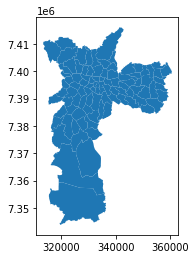

In [ ]:

dados_mapa.plot()

In [ ]:
dados_mapa = dados_mapa.sort_values('ds_codigo')
dados_mapa

,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,ds_codigo,geometry
43,None,MOOCA,ARA,AGUA RASA,None,25,1,"POLYGON ((341093.380 7391912.491, 341093.329 7..."
56,None,MOOCA,BRS,BRAS,None,25,10,"POLYGON ((333984.370 7396019.757, 333985.591 7..."
57,None,FREGUESIA-BRASILANDIA,BRL,BRASILANDIA,None,03,11,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
58,None,BUTANTA,BUT,BUTANTA,None,10,12,"POLYGON ((322177.067 7393085.002, 322176.956 7..."
59,None,CASA VERDE-CACHOEIRINHA,CAC,CACHOEIRINHA,None,04,13,"POLYGON ((330950.659 7402181.997, 330944.935 7..."
...,...,...,...,...,...,...,...,...
38,None,VILA MARIA-VILA GUILHERME,VMD,VILA MEDEIROS,None,07,92,"POLYGON ((340579.417 7401672.553, 340579.493 7..."
39,None,VILA PRUDENTE,VPR,VILA PRUDENTE,None,29,93,"POLYGON ((341731.295 7388459.495, 341723.755 7..."
42,None,BUTANTA,VSO,VILA SONIA,None,10,94,"POLYGON ((320805.525 7390280.495, 320824.353 7..."
23,None,PIRITUBA-JARAGUA,SDO,SAO DOMINGOS,None,02,95,"POLYGON ((319854.036 7402894.086, 319864.990 7..."


In [ ]:
data = data.sort_values('cod_ibge')
data

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,f1,f2,rankings,dist_names
0,1,Água Rasa,1961,34.619999,7.6,32,13.860000,-1.84,52.980000,0.00,125.610001,0.682371,-0.761299,0.277272,AGUA RASA
9,2,Brás,1942,28.969999,7.0,30,13.640000,-4.48,120.669998,0.00,76.190002,0.114900,-0.390285,0.012780,BRAS
10,3,Brasilândia,975,8.220000,5.8,22,22.000000,3.14,125.019997,16.60,112.059998,-1.531760,-0.050288,-0.850000,BRASILANDIA
11,4,Butantã,2311,50.320000,8.4,31,18.129999,-1.60,44.730000,0.26,42.820000,0.843868,0.644034,0.548012,BUTANTA
12,5,Cachoeirinha,1347,12.340000,6.2,23,15.710000,2.28,105.599998,17.42,105.919998,-1.011355,0.394805,-0.505847,CACHOEIRINHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.430000,-1.41,77.980003,2.49,188.929993,-0.099947,-1.876371,-0.297786,VILA MEDEIROS
92,93,Vila Prudente,1755,32.080002,7.2,30,14.360000,-2.55,66.510002,7.43,101.440002,0.292861,-0.175635,0.138547,VILA PRUDENTE
93,94,Vila Sônia,2970,41.410000,7.4,27,16.760000,-0.90,74.680000,14.93,80.120003,0.203269,1.141560,0.259619,VILA SONIA
94,95,São Domingos,2047,23.510000,6.8,26,14.300000,0.71,62.349998,8.55,72.919998,-0.117800,0.698634,0.025514,SAO DOMINGOS


In [ ]:
nomes_distritos = [unidecode(distrito).upper() for distrito in data['distritos']]
nomes_distritos

['AGUA RASA',
 'BRAS',
 'BRASILANDIA',
 'BUTANTA',
 'CACHOEIRINHA',
 'CAMBUCI',
 'CAMPO BELO',
 'CAMPO GRANDE',
 'CAMPO LIMPO',
 'CANGAIBA',
 'CAPAO REDONDO',
 'ALTO DE PINHEIROS',
 'CARRAO',
 'CASA VERDE',
 'CIDADE ADEMAR',
 'CIDADE DUTRA',
 'CIDADE LIDER',
 'CIDADE TIRADENTES',
 'CONSOLACAO',
 'CURSINO',
 'ERMELINO MATARAZZO',
 'FREGUESIA DO O',
 'ANHANGUERA',
 'GRAJAU',
 'GUAIANASES',
 'MOEMA',
 'IGUATEMI',
 'IPIRANGA',
 'ITAIM BIBI',
 'ITAIM PAULISTA',
 'ITAQUERA',
 'JABAQUARA',
 'JACANA',
 'ARICANDUVA',
 'JAGUARA',
 'JAGUARE',
 'JARAGUA',
 'JARDIM ANGELA',
 'JARDIM HELENA',
 'JARDIM PAULISTA',
 'JARDIM SAO LUIS',
 'JOSE BONIFACIO',
 'LAPA',
 'LIBERDADE',
 'ARTUR ALVIM',
 'LIMAO',
 'MANDAQUI',
 'MARSILAC',
 'MOOCA',
 'MORUMBI',
 'PARELHEIROS',
 'PARI',
 'PARQUE DO CARMO',
 'PEDREIRA',
 'PENHA',
 'BARRA FUNDA',
 'PERDIZES',
 'PERUS',
 'PINHEIROS',
 'PIRITUBA',
 'PONTE RASA',
 'RAPOSO TAVARES',
 'REPUBLICA',
 'RIO PEQUENO',
 'SARCOMA',
 'SANTA CECILIA',
 'BELA VISTA',
 'SANTANA',
 'S

In [ ]:
data['nome_distrito'] = nomes_distritos

In [ ]:
distritos_distintos = data['nome_distrito'].values != dados_mapa['ds_nome'].values
distritos_distintos.sum()

1

In [ ]:
data[distritos_distintos]

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,f1,f2,rankings,dist_names,nome_distrito
67,65,Sarcomã,1608,19.1,6.8,26,13.02,0.53,82.18,20.34,152.720001,-0.387175,-0.077455,-0.223226,SARCOMA,SARCOMA


In [ ]:
dados_mapa[distritos_distintos]

,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,ds_codigo,geometry
19,None,IPIRANGA,SAC,SACOMA,None,13,68,"POLYGON ((338736.624 7387832.779, 338733.609 7..."


In [ ]:
data.replace({'SARCOMA':'SACOMA', 'Sarcomã':'Sacoma'}, inplace = True)

In [ ]:
data[distritos_distintos]

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,f1,f2,rankings,dist_names,nome_distrito
67,65,Sacoma,1608,19.1,6.8,26,13.02,0.53,82.18,20.34,152.720001,-0.387175,-0.077455,-0.223226,SACOMA,SACOMA


In [ ]:
dados_completos = dados_mapa.merge(data, left_on = 'ds_nome', right_on = 'nome_distrito')
dados_completos

,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,ds_codigo,geometry,cod_ibge,distritos,...,mortalidade,txcresc,causasext,favel,denspop,f1,f2,rankings,dist_names,nome_distrito
0,None,MOOCA,ARA,AGUA RASA,None,25,1,"POLYGON ((341093.380 7391912.491, 341093.329 7...",1,Água Rasa,...,13.860000,-1.84,52.980000,0.00,125.610001,0.682371,-0.761299,0.277272,AGUA RASA,AGUA RASA
1,None,MOOCA,BRS,BRAS,None,25,10,"POLYGON ((333984.370 7396019.757, 333985.591 7...",2,Brás,...,13.640000,-4.48,120.669998,0.00,76.190002,0.114900,-0.390285,0.012780,BRAS,BRAS
2,None,FREGUESIA-BRASILANDIA,BRL,BRASILANDIA,None,03,11,"POLYGON ((324895.091 7404257.969, 324893.588 7...",3,Brasilândia,...,22.000000,3.14,125.019997,16.60,112.059998,-1.531760,-0.050288,-0.850000,BRASILANDIA,BRASILANDIA
3,None,BUTANTA,BUT,BUTANTA,None,10,12,"POLYGON ((322177.067 7393085.002, 322176.956 7...",4,Butantã,...,18.129999,-1.60,44.730000,0.26,42.820000,0.843868,0.644034,0.548012,BUTANTA,BUTANTA
4,None,CASA VERDE-CACHOEIRINHA,CAC,CACHOEIRINHA,None,04,13,"POLYGON ((330950.659 7402181.997, 330944.935 7...",5,Cachoeirinha,...,15.710000,2.28,105.599998,17.42,105.919998,-1.011355,0.394805,-0.505847,CACHOEIRINHA,CACHOEIRINHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,None,VILA MARIA-VILA GUILHERME,VMD,VILA MEDEIROS,None,07,92,"POLYGON ((340579.417 7401672.553, 340579.493 7...",92,Vila Medeiros,...,15.430000,-1.41,77.980003,2.49,188.929993,-0.099947,-1.876371,-0.297786,VILA MEDEIROS,VILA MEDEIROS
92,None,VILA PRUDENTE,VPR,VILA PRUDENTE,None,29,93,"POLYGON ((341731.295 7388459.495, 341723.755 7...",93,Vila Prudente,...,14.360000,-2.55,66.510002,7.43,101.440002,0.292861,-0.175635,0.138547,VILA PRUDENTE,VILA PRUDENTE
93,None,BUTANTA,VSO,VILA SONIA,None,10,94,"POLYGON ((320805.525 7390280.495, 320824.353 7...",94,Vila Sônia,...,16.760000,-0.90,74.680000,14.93,80.120003,0.203269,1.141560,0.259619,VILA SONIA,VILA SONIA
94,None,PIRITUBA-JARAGUA,SDO,SAO DOMINGOS,None,02,95,"POLYGON ((319854.036 7402894.086, 319864.990 7...",95,São Domingos,...,14.300000,0.71,62.349998,8.55,72.919998,-0.117800,0.698634,0.025514,SAO DOMINGOS,SAO DOMINGOS


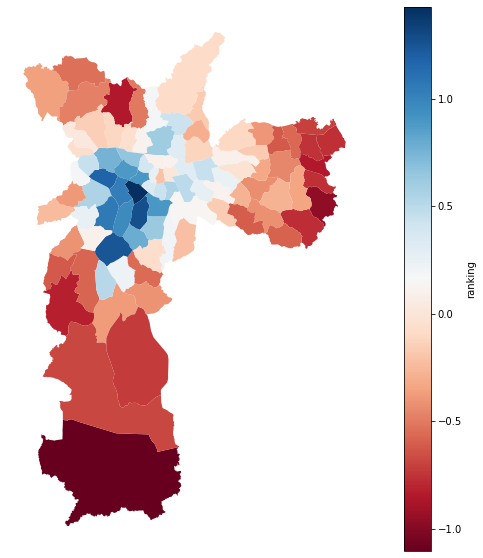

In [ ]:
dados_completos.plot(column = 'rankings', legend = True, 
                     legend_kwds = {'label': 'ranking', 'orientation':'vertical'},
                     cmap = 'RdBu', figsize = (15,10))
plt.axis('off');

In [ ]:
dados_completos['coords'] = dados_completos['geometry'].apply(lambda x: x.representative_point().coords[0])
dados_completos

,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,ds_codigo,geometry,cod_ibge,distritos,...,txcresc,causasext,favel,denspop,f1,f2,rankings,dist_names,nome_distrito,coords
0,None,MOOCA,ARA,AGUA RASA,None,25,1,"POLYGON ((341093.380 7391912.491, 341093.329 7...",1,Água Rasa,...,-1.84,52.980000,0.00,125.610001,0.682371,-0.761299,0.277272,AGUA RASA,AGUA RASA,"(339387.2901788816, 7393023.0086093545)"
1,None,MOOCA,BRS,BRAS,None,25,10,"POLYGON ((333984.370 7396019.757, 333985.591 7...",2,Brás,...,-4.48,120.669998,0.00,76.190002,0.114900,-0.390285,0.012780,BRAS,BRAS,"(335030.83474223374, 7395347.285876718)"
2,None,FREGUESIA-BRASILANDIA,BRL,BRASILANDIA,None,03,11,"POLYGON ((324895.091 7404257.969, 324893.588 7...",3,Brasilândia,...,3.14,125.019997,16.60,112.059998,-1.531760,-0.050288,-0.850000,BRASILANDIA,BRASILANDIA,"(327333.5972931904, 7405864.031109093)"
3,None,BUTANTA,BUT,BUTANTA,None,10,12,"POLYGON ((322177.067 7393085.002, 322176.956 7...",4,Butantã,...,-1.60,44.730000,0.26,42.820000,0.843868,0.644034,0.548012,BUTANTA,BUTANTA,"(324240.9925624224, 7392411.333930044)"
4,None,CASA VERDE-CACHOEIRINHA,CAC,CACHOEIRINHA,None,04,13,"POLYGON ((330950.659 7402181.997, 330944.935 7...",5,Cachoeirinha,...,2.28,105.599998,17.42,105.919998,-1.011355,0.394805,-0.505847,CACHOEIRINHA,CACHOEIRINHA,"(330060.6684117045, 7405750.576595976)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,None,VILA MARIA-VILA GUILHERME,VMD,VILA MEDEIROS,None,07,92,"POLYGON ((340579.417 7401672.553, 340579.493 7...",92,Vila Medeiros,...,-1.41,77.980003,2.49,188.929993,-0.099947,-1.876371,-0.297786,VILA MEDEIROS,VILA MEDEIROS,"(338906.5056916323, 7401566.226537302)"
92,None,VILA PRUDENTE,VPR,VILA PRUDENTE,None,29,93,"POLYGON ((341731.295 7388459.495, 341723.755 7...",93,Vila Prudente,...,-2.55,66.510002,7.43,101.440002,0.292861,-0.175635,0.138547,VILA PRUDENTE,VILA PRUDENTE,"(339299.39560519956, 7390001.382577186)"
93,None,BUTANTA,VSO,VILA SONIA,None,10,94,"POLYGON ((320805.525 7390280.495, 320824.353 7...",94,Vila Sônia,...,-0.90,74.680000,14.93,80.120003,0.203269,1.141560,0.259619,VILA SONIA,VILA SONIA,"(322450.1964881728, 7389005.650136946)"
94,None,PIRITUBA-JARAGUA,SDO,SAO DOMINGOS,None,02,95,"POLYGON ((319854.036 7402894.086, 319864.990 7...",95,São Domingos,...,0.71,62.349998,8.55,72.919998,-0.117800,0.698634,0.025514,SAO DOMINGOS,SAO DOMINGOS,"(321422.20981266396, 7400742.572795264)"


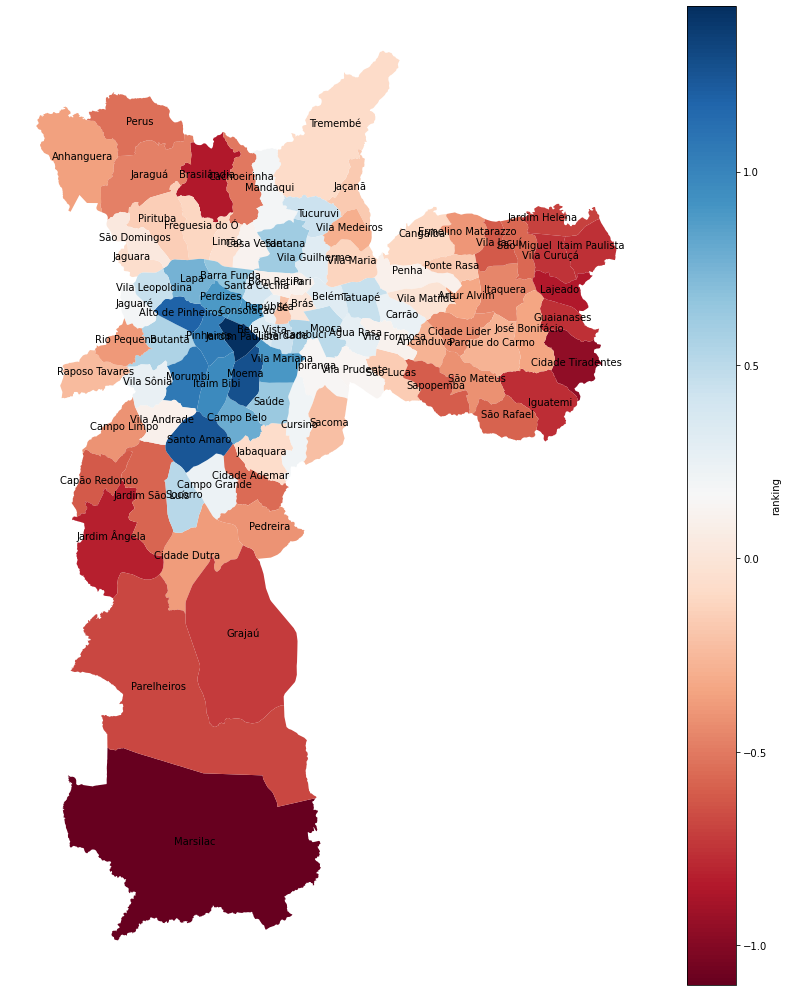

In [ ]:
dados_completos.plot(column = 'rankings', legend = True, 
                     legend_kwds = {'label': 'ranking', 'orientation':'vertical'},
                     cmap = 'RdBu', figsize = (15,18))
plt.axis('off')
for indice, linha in dados_completos.iterrows():
    plt.annotate(s = linha['distritos'], xy=linha['coords'], horizontalalignment = 'center', color = 'black')

In [ ]:
dados_completos.explore(column = 'rankings',
                        cmap = 'seismic_r',
                        tooltip = 'distritos',
                        tooltip_kwds = dict(label = False))

In [ ]:
base = dados_completos.explore(column = 'rankings',
                        cmap = 'seismic_r',
                        tooltip = 'distritos',
                        tooltip_kwds = dict(label = False),
                        name = 'Distritos do município de São Paulo')
folium.TileLayer('Open Street Map').add_to(base)
folium.TileLayer('Stamen Terrain').add_to(base)
folium.TileLayer('cartodbpositron').add_to(base)
folium.TileLayer('Stamen Toner').add_to(base)
folium.LayerControl().add_to(base)
base

In [ ]:
base.save('rankings.html')